<a href="https://colab.research.google.com/github/carolflyjs/cs230/blob/master/LSTM_Model_64d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%run "/content/drive/My Drive/Colab Notebooks/Data_Processing_v2.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/utils.ipynb"

     |████████████████████████████████| 1.9MB 2.8MB/s 


Using TensorFlow backend.


load_file(path, delimiter=","): return df
data_prep(df, x_columns, y_columns): return X_train, Y_train
removeSpellingErrors(df): return new_df
tokenize_and_pad(X_train), return X_train_padded, max_value, vocab_size, tokenizer
store_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
load_weights(mode, model_name, path="/content/drive/My Drive/cs230/")
join_histories_and_plot(*histories)

load_embedding_matrix(embeddings_index, vocab_size, embedding_dim, word_index)
embedding_index = pre-trained embedding dictionary with key being the word and value being the embedding scores
vocab_size = total number of unique tokens in the training data
embedding_dim = dimension used in the embedding_index for each token
word_index = token dictionary with key being the word and value being the token



In [0]:
def build_lstm_model(max_value, embedding_dim = 10, LSTM_dim = 128): 
    X_input = Input(shape=(max_value * 2,), dtype="int32")
    X = Embedding(vocab_size, embedding_dim)(X_input)
    X = LSTM(LSTM_dim, kernel_regularizer=keras.regularizers.l2(0.01))(X)
    # X = keras.layers.Flatten("channels_last")(X)
    X = Dense(5, activation="softmax")(X)

    model = Model(inputs=[X_input], outputs=X)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    model.summary()

    return model

In [3]:
lstm_model = build_lstm_model(max_value=max_value, embedding_dim=16, LSTM_dim=64)






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 16, 16)            56272     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                20736     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 77,333
Trainable params: 77,333
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = lstm_model.fit(x=X_train_tokenized, y=Y_train, batch_size=32, epochs=50, validation_data=(X_dev_tokenized, Y_dev), class_weight=class_weight)

Train on 290693 samples, validate on 18723 samples
Epoch 1/40
290693/290693 [==============================] - 141s 485us/step - loss: 1.3055 - categorical_accuracy: 0.7751 - val_loss: 0.5732 - val_categorical_accuracy: 0.8113
Epoch 2/40
290693/290693 [==============================] - 144s 495us/step - loss: 0.9729 - categorical_accuracy: 0.8238 - val_loss: 0.4715 - val_categorical_accuracy: 0.8466
Epoch 3/40
290693/290693 [==============================] - 144s 496us/step - loss: 0.7913 - categorical_accuracy: 0.8570 - val_loss: 0.4143 - val_categorical_accuracy: 0.8695
Epoch 4/40
290693/290693 [==============================] - 146s 502us/step - loss: 0.6796 - categorical_accuracy: 0.8792 - val_loss: 0.3746 - val_categorical_accuracy: 0.8854
Epoch 5/40
290693/290693 [==============================] - 148s 508us/step - loss: 0.6015 - categorical_accuracy: 0.8959 - val_loss: 0.3996 - val_categorical_accuracy: 0.8739
Epoch 6/40
290693/290693 [==============================] - 143s 491u

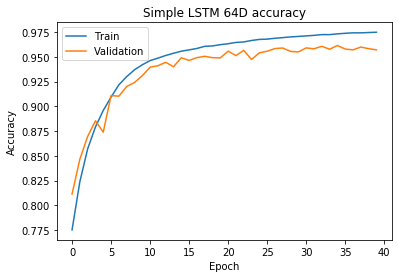

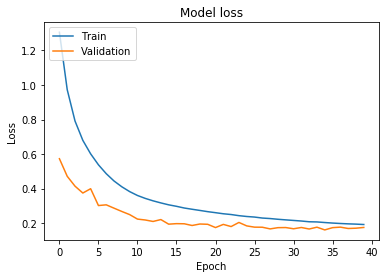

In [7]:
combined = join_histories_and_plot("Simple LSTM 64D", history)

In [8]:
getConfusionMatrix(lstm_model, X_test_tokenized, Y_test)

[[ 925    0    9    7   12]
 [   2 1056    2   10   12]
 [   1    0  190   14    1]
 [   0    1   10  192    2]
 [  15    9   12   13  611]]


In [9]:
lstm_model.evaluate(X_test_tokenized, Y_test)

3106/3106 [==============================] - 0s 92us/step


[0.16351377153235408, 0.9575016097875081]